# This is about Chapter 6, Think Bayes by Allen Downey

- In Bayesian estimation, the result comes in the form of a posterior distribution
- Bayesian methods are most useful when you can carry the posterior distribution into the next step of the analysis to perform some kind of decision analysis.
- Summarizing the posterior distribution by computing the mean or the maximum likelihood estimate is not the goal of Bayesian estimation. If that is all you need, you probably don't need Bayesian methods in the first place.

### Procedure of Bayesian Analysis

1. Think about hypotheses and build up Prior distribution
1. Then compute Likelihood for each hypothesis
1. Try to compute posterior distribution
1. Then, try to make a decision using the posterior distribution.

### 1. Let's make prior distribution

In [2]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
datafile1 = 'showcases.2011.csv'
datafile2 = 'showcases.2012.csv'

showcase1 = []
showcase2 = []
with open(datafile1, 'r') as file:
    reader = csv.reader (file)
    for line in reader:
#        print (line)
        if line[0] == 'Showcase 1':
            showcase1 += line[1:]
        #
        if line[0] == 'Showcase 2':
            showcase2 += line[1:]
    #
#
with open(datafile2, 'r') as file:
    reader = csv.reader (file)
    for line in reader:
#        print (line)
        if line[0] == 'Showcase 1':
            showcase1 += line[1:]
        #
        if line[0] == 'Showcase 2':
            showcase2 += line[1:]
    #
#

In [8]:
print (showcase1)

['50969', '21901', '32815', '44432', '24273', '30554', '20963', '28941', '25851', '28800', '37703', '34774', '25268', '44044', '32516', '30827', '40374', '27698', '23590', '38625', '24026', '37449', '34268', '22281', '22890', '24226', '25448', '32525', '36799', '27380', '25903', '31769', '22853', '23202', '20721', '28451', '26154', '27019', '51959', '35811', '24885', '24648', '30707', '23744', '45078', '20773', '30892', '29971', '37423', '33593', '24866', '24628', '24827', '29248', '24818', '28762', '31838', '22268', '38892', '22599', '31705', '23299', '21394', '22589', '30573', '33009', '19612', '28550', '49937', '36915', '33400', '34516', '31516', '51108', '23981', '26383', '39801', '39201', '19563', '20418', '28465', '22356', '24150', '20425', '23926', '20860', '35526', '20912', '27426', '26393', '25329', '22434', '31933', '23986', '24729', '21747', '27273', '21681', '29324', '35874', '30397', '27310', '28414', '32535', '22886', '29842', '35954', '27883', '31268', '21563', '39642', 

In [14]:
tmp = [int(s) for s in showcase1]
showcase1 = np.array(tmp)
showcase2 = np.array( [int(s) for s in showcase2])

In [16]:
print (showcase1.shape, showcase1[:10])

(313,) [50969 21901 32815 44432 24273 30554 20963 28941 25851 28800]


#### Let's read all of the data file.
- Maybe it's better to make a function to read the file
- switch/case for Python: https://www.pydanny.com/why-doesnt-python-have-switch-case.html

In [19]:
datafile = [datafile1, datafile2]

showcase1 = []
showcase2 = []
bid1 = []
bid2 = []
diff1 = []
diff2 = []
for afile in datafile:
    with open(afile, 'r') as file:
        reader = csv.reader (file)
        for line in reader:
    #        print (line)
            if line[0] == 'Showcase 1':
                showcase1 += line[1:]
            #
            if line[0] == 'Showcase 2':
                showcase2 += line[1:]
            if line[0] == 'Bid 1': 
                bid1 += line[1:]
            if line[0] == 'Bid 2':
                bid2 += line[1:]
            if line[0] == 'Difference 1':
                diff1 += line[1:]
            if line[0] == 'Difference 2':
                diff2 += line[1:]
        #
    #
#
showcase1 = np.array( [int(s) for s in showcase1])
showcase2 = np.array( [int(s) for s in showcase2])
bid1 = np.array( [int(s) for s in bid1])
bid2 = np.array( [int(s) for s in bid2])
diff1 = np.array( [int(s) for s in diff1])
diff2 = np.array( [int(s) for s in diff2])

In [21]:
bid1[:10]

array([42000, 14000, 32000, 27000, 18750, 27222, 25000, 35000, 22500,
       21300])

### Prior distribution of showcase prices is estimated by KDE

- See https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

In [25]:
from scipy.stats import gaussian_kde

In [48]:
prior_kde1 = scipy.stats.gaussian_kde (showcase1)
prior_kde2 = scipy.stats.gaussian_kde (showcase2)

In [49]:
min(showcase1), max(showcase1), min(showcase2), max(showcase2)

(19563, 58342, 18349, 71628)

In [50]:
# Let's choose the domain of prices = [0, 75000]
low, high = 0, 75000
n = 101
xs = np.linspace(low, high, n)

In [51]:
xs

array([    0.,   750.,  1500.,  2250.,  3000.,  3750.,  4500.,  5250.,
        6000.,  6750.,  7500.,  8250.,  9000.,  9750., 10500., 11250.,
       12000., 12750., 13500., 14250., 15000., 15750., 16500., 17250.,
       18000., 18750., 19500., 20250., 21000., 21750., 22500., 23250.,
       24000., 24750., 25500., 26250., 27000., 27750., 28500., 29250.,
       30000., 30750., 31500., 32250., 33000., 33750., 34500., 35250.,
       36000., 36750., 37500., 38250., 39000., 39750., 40500., 41250.,
       42000., 42750., 43500., 44250., 45000., 45750., 46500., 47250.,
       48000., 48750., 49500., 50250., 51000., 51750., 52500., 53250.,
       54000., 54750., 55500., 56250., 57000., 57750., 58500., 59250.,
       60000., 60750., 61500., 62250., 63000., 63750., 64500., 65250.,
       66000., 66750., 67500., 68250., 69000., 69750., 70500., 71250.,
       72000., 72750., 73500., 74250., 75000.])

In [54]:
# Now, PMF is computed based on the prior density function

def MakePmf (xs, kde):
    p = np.zeros(xs.shape)
    for i in range(xs.shape[0]):
        p[i] = kde.evaluate (xs[i])

    p /= sum(p)
    return p
#

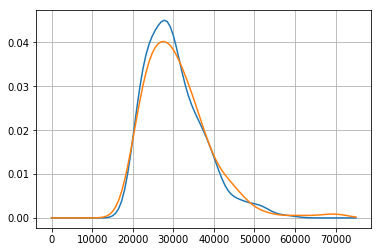

In [55]:
prior_pmf1 = MakePmf (xs, prior_kde1)
prior_pmf2 = MakePmf (xs, prior_kde2)

plt.grid(True)
plt.plot (xs, prior_pmf1, xs, prior_pmf2)

Now we finished to compute prior distributions for player 1 and player 2 respectively.